In [89]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
import datetime
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
from sklearn.model_selection import train_test_split
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/stock-market-india/FullData.h5
/kaggle/input/stock-market-india/FullDataCsv/SUNTV__EQ__NSE__NSE__MINUTE.csv
/kaggle/input/stock-market-india/FullDataCsv/MANAPPURAM__EQ__NSE__NSE__MINUTE.csv
/kaggle/input/stock-market-india/FullDataCsv/GODREJPROP__EQ__NSE__NSE__MINUTE.csv
/kaggle/input/stock-market-india/FullDataCsv/PFIZER__EQ__NSE__NSE__MINUTE.csv
/kaggle/input/stock-market-india/FullDataCsv/ICICIBANK__EQ__NSE__NSE__MINUTE.csv
/kaggle/input/stock-market-india/FullDataCsv/DRREDDY__EQ__NSE__NSE__MINUTE.csv
/kaggle/input/stock-market-india/FullDataCsv/HDFCBANK__EQ__NSE__NSE__MINUTE.csv
/kaggle/input/stock-market-india/FullDataCsv/NAM_INDIA__EQ__NSE__NSE__MINUTE.csv
/kaggle/input/stock-market-india/FullDataCsv/SANOFI__EQ__NSE__NSE__MINUTE.csv
/kaggle/input/stock-market-india/FullDataCsv/BEL__EQ__NSE__NSE__MINUTE.csv
/kaggle/input/stock-market-india/FullDataCsv/MARUTI__EQ__NSE__NSE__MINUTE.csv
/kaggle/input/stock-market-india/FullDataCsv/SYNGENE__EQ__NSE__NSE__MINUTE.csv
/kagg

In [90]:
#Fetching news data
fnews=pd.read_csv('/kaggle/input/indian-financial-news-articles-20032020/IndianFinancialNews.csv')
nnews=pd.read_csv('/kaggle/input/india-headlines-news-dataset/india-news-headlines.csv')

In [91]:
nnews.head()

,publish_date,headline_category,headline_text
0,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...
1,20010102,unknown,Fissures in Hurriyat over Pak visit
2,20010102,unknown,America's unwanted heading for India?
3,20010102,unknown,For bigwigs; it is destination Goa
4,20010102,unknown,Extra buses to clear tourist traffic


In [92]:
#Fetchng details of stock
stockDetails=pd.read_csv('/kaggle/input/nifty50-stock-market-data/KOTAKBANK.csv')

In [93]:
stockDetails.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-01-03,KOTAKMAH,EQ,212.35,220.0,229.35,220.00,229.35,229.35,229.13,7086,1.623640e+11,NaN,NaN,NaN
1,2000-01-04,KOTAKMAH,EQ,229.35,247.7,247.70,225.25,247.70,246.95,244.12,73681,1.798729e+12,NaN,NaN,NaN
2,2000-01-05,KOTAKMAH,EQ,246.95,229.0,240.00,227.20,228.00,228.40,233.75,105799,2.473093e+12,NaN,NaN,NaN
3,2000-01-06,KOTAKMAH,EQ,228.40,235.1,239.00,217.00,224.95,225.90,226.84,40202,9.119546e+11,NaN,NaN,NaN
4,2000-01-07,KOTAKMAH,EQ,225.90,213.0,219.00,207.85,207.85,208.85,209.94,24463,5.135747e+11,NaN,NaN,NaN


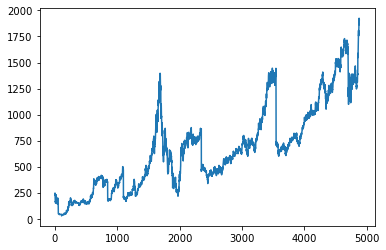

In [94]:
import matplotlib.pyplot as plt

plt.plot(stockDetails['Close'].to_list()[:])
dftoproc=dftoproc[:]

In [95]:
fnews=fnews.drop(columns=['Description'])

In [96]:
#Processing news to create dataframe with uique dates
dfnews=pd.DataFrame(columns=['Date','Title'])
uni=fnews['Date'].unique()

for each in uni:
    df=fnews[fnews['Date']==each]
    tmp=""
    for title in df['Title']:
        tmp=tmp+str(title)+". "
    dfnews=dfnews.append({'Date':each,'Title':tmp},ignore_index=True)


In [97]:
dfnews['Date'].nunique()

6068

In [98]:
#Combining three days of news
newsobj=pd.DataFrame(columns=['Date','Title'])

for each in range(dfnews['Date'].nunique()-3):
    tmp1=dfnews['Title'][each]
    tmp2=dfnews['Title'][each+1]
    tmp3=dfnews['Title'][each+2]
    tmp=tmp1+tmp2+tmp3
    newsobj=newsobj.append({'Date':dfnews['Date'][each],'Title':tmp},ignore_index=True)
    

In [99]:
import tensorflow_hub as hub
elmo=hub.load("https://tfhub.dev/google/elmo/3")
newsobj.head(10)

,Date,Title
0,"May 26, 2020, Tuesday","ATMs to become virtual bank branches, accept d..."
1,"May 25, 2020, Monday","Huge scam in YES Bank for many years, says Enf..."
2,"May 24, 2020, Sunday","Bank of Maharashtra sanctioned Rs 2,789 cr in ..."
3,"May 23, 2020, Saturday",DCB Bank's profit before tax declines 37.6% to...
4,"May 22, 2020, Friday","Retail, MSME loans to get cheaper as RBI cuts ..."
5,"May 21, 2020, Thursday",Covid-19: Banking slippages may rise by Rs 5.5...
6,"May 20, 2020, Wednesday",Govt to use RBI money to support struggling NB...
7,"May 19, 2020, Tuesday",PSBs report sharp rise in deposits thanks to Y...
8,"May 18, 2020, Monday","All for liquidity: Watch every rupee, chase du..."
9,"May 17, 2020, Sunday",Reserve Bank makes $21-billion cut to US treas...


In [100]:
!pip install sentence_transformers

You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.


In [101]:
news_list=newsobj['Title'].to_list()

In [102]:
#Setting proper date format for news
newsobj['Date'].unique()[-1]
def chng(dt):
    lst=dt.split(" ")
    datetime_object = datetime.datetime.strptime(lst[0], "%B")
    dateobj=datetime.datetime(int(lst[2].strip(",")),int(datetime_object.month),int(lst[1].strip(",")))
    return dateobj.strftime("%Y-%m-%d")
for i in range(newsobj['Date'].nunique()):
    newsobj['Date'][i]=chng(newsobj['Date'][i])
    

# Importing transformer and creating embeddings

In [103]:
from sentence_transformers import SentenceTransformer, util
import torch

embedder = SentenceTransformer('distilbert-base-nli-stsb-mean-tokens')

In [104]:
#Comment after encoding and saving
# corpus_embeddings = embedder.encode(news_list, convert_to_tensor=True)
# newsobj['Embed']=corpus_embeddings
#comment this after saving embeddings and use the text file  by loading 
# torch.save(corpus_embeddings,'embed.txt')

In [105]:
newsobj['Embed']=torch.load('/kaggle/input/elmoembedings/embed.txt')

In [106]:
newsobj.head()

,Date,Title,Embed
0,2020-05-26,"ATMs to become virtual bank branches, accept d...","(tensor(0.3043), tensor(0.2123), tensor(1.0111..."
1,2020-05-25,"Huge scam in YES Bank for many years, says Enf...","(tensor(0.6461), tensor(-0.0710), tensor(0.305..."
2,2020-05-24,"Bank of Maharashtra sanctioned Rs 2,789 cr in ...","(tensor(0.6530), tensor(-0.0917), tensor(0.315..."
3,2020-05-23,DCB Bank's profit before tax declines 37.6% to...,"(tensor(0.6701), tensor(0.2476), tensor(0.2894..."
4,2020-05-22,"Retail, MSME loans to get cheaper as RBI cuts ...","(tensor(-0.1602), tensor(0.0779), tensor(0.316..."


In [107]:
stockDetails.iloc[:,:].shape

(4883, 15)

In [108]:
#date wise merging of news and stock price data
dftoproc=pd.merge(stockDetails,newsobj,on='Date')
# dftoproc=stockDetails

In [109]:
dftoproc.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,Title,Embed
0,2003-02-14,KOTAKMAH,EQ,180.50,177.80,181.90,175.0,178.00,177.30,177.14,89885,1.592262e+12,NaN,31842.0,0.3543,Panel Report On Overhaul Of Recovery Of Debts ...,"(tensor(-0.0070), tensor(-0.0478), tensor(0.51..."
1,2003-02-17,KOTAKMAH,EQ,177.30,181.25,183.00,178.0,180.00,180.40,180.62,55079,9.948400e+11,NaN,18063.0,0.3279,Is The Honeymoon In The Debt Market Over?. A C...,"(tensor(0.3798), tensor(0.2484), tensor(0.5687..."
2,2003-02-18,KOTAKMAH,EQ,180.40,182.75,183.00,178.0,179.00,179.05,179.77,38517,6.924324e+11,NaN,17232.0,0.4474,"Jalan, Modi To Meet On Feb 21. Exim Bank Takes...","(tensor(0.0311), tensor(0.4204), tensor(0.6754..."
3,2003-02-19,KOTAKMAH,EQ,179.05,180.00,182.00,172.0,173.75,175.00,176.29,38591,6.803256e+11,NaN,16113.0,0.4175,Rbi Plans To Overhaul Banks & #8217; Audit Sys...,"(tensor(-0.1734), tensor(0.4501), tensor(0.148..."
4,2003-02-20,KOTAKMAH,EQ,175.00,173.00,184.45,172.1,177.00,177.00,179.88,111626,2.007953e+12,NaN,19231.0,0.1723,India Ranks High On Allianz Radar. Reinsurers ...,"(tensor(-0.2168), tensor(0.4530), tensor(0.643..."


In [110]:
#Removing extra details
dftoproc=dftoproc.drop('Turnover',axis=1)
dftoproc=dftoproc.drop('Trades',axis=1)
dftoproc=dftoproc.drop('Deliverable Volume',axis=1)
dftoproc=dftoproc.drop('%Deliverble',axis=1)
dftoproc=dftoproc.drop('Series',axis=1)
dftoproc=dftoproc.drop('Symbol',axis=1)

In [111]:
# for i in range(3123):
#     dftoproc['Close'][i]=int(dftoproc['Close'][i])/10

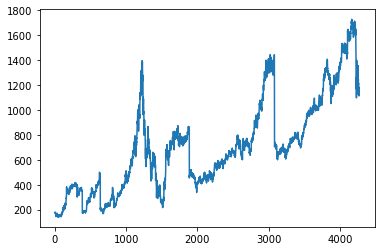

In [112]:
import matplotlib.pyplot as plt

plt.plot(dftoproc['Close'].to_list()[:])
dftoproc=dftoproc[:]

In [113]:
#Not in use
chg=[]
for i in range(dftoproc.shape[0]-1):
    chg.append((float(dftoproc['Prev Close'][i+1])-float(dftoproc['Prev Close'][i]))/float(dftoproc['Prev Close'][i]))
chg.insert(0,0.0)
len(chg)
dftoproc['change']=chg

# Preprocessing and splitting data

In [114]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
temp=dftoproc['Close'].to_numpy()
dftoproc['Close'] = scaler.fit_transform(temp.reshape(temp.shape[0],1))

In [115]:
def split_sequence(sequence, n_steps):
	X, y = list(), list()
	for i in range(len(sequence)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the sequence
		if end_ix > len(sequence)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return X,y
x,y=split_sequence(dftoproc['Close'].to_list(), 60)

In [116]:
dftoproc=dftoproc.iloc[60:,:]

In [117]:
dftoproc.shape

(4211, 12)

In [118]:
len(x)

4211

In [119]:
dftoproc.insert(2,'Series',x)

In [120]:
dftoproc.shape[0]

4211

In [121]:
dftoproc=dftoproc.reset_index()

In [122]:
embed=dftoproc['Embed'].apply(lambda x: [x[i].numpy() for i in range(len(x))])
embed=embed.to_numpy()
embed=np.array([np.array(i) for i in embed])

In [144]:
embed.shape

(4211, 768)

In [123]:
series=dftoproc['Series'].apply(lambda x: [np.array(x[i]) for i in range(len(x))])

In [124]:
series=series.to_numpy()
series=np.array([np.array(i) for i in series])

In [125]:
series

array([[0.02235939, 0.0243119 , 0.02346161, ..., 0.00116521, 0.00233042,
        0.0051962 ],
       [0.0243119 , 0.02346161, 0.02091075, ..., 0.00233042, 0.0051962 ,
        0.01064433],
       [0.02346161, 0.02091075, 0.02217044, ..., 0.0051962 , 0.01064433,
        0.00906972],
       ...,
       [0.97575109, 0.98211249, 0.97257038, ..., 0.61211186, 0.6226932 ,
        0.64136802],
       [0.98211249, 0.97257038, 0.9677206 , ..., 0.6226932 , 0.64136802,
        0.63516407],
       [0.97257038, 0.9677206 , 0.96617749, ..., 0.64136802, 0.63516407,
        0.641431  ]])

In [126]:
series = np.reshape(series, (series.shape[0], series.shape[1], 1))

In [127]:
series.shape

(4211, 60, 1)

In [128]:
targ=dftoproc['Close'].to_numpy()
targ=targ.reshape((targ.shape[0],1))

In [129]:
targ.shape


(4211, 1)

In [145]:
X_train, X_test, y_train, y_test = train_test_split(series, targ, test_size=0.2,shuffle=False,stratify=None)
X_train2, X_test2, y_train2, y_test2 = train_test_split(embed, targ, test_size=0.2)




In [146]:
X_train2.shape

(3368, 768)

In [147]:
X_train.shape

(3368, 60, 1)

In [148]:
X_test.shape

(843, 60, 1)

In [149]:
y_train

array([[0.01064433],
       [0.00906972],
       [0.00765258],
       ...,
       [0.36641053],
       [0.37034704],
       [0.37299238]])

In [150]:
y_train.shape

(3368, 1)

# Model 

In [152]:
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import LSTM,Dense,Input,Dropout,Concatenate,Flatten
from keras.layers.merge import concatenate

model1=Sequential()
model1.add(Input(shape=(768,)))
model1.add(Dense(300,activation='relu'))
model1.add(Dense(100,activation='relu'))
model1.add(Dense(30,activation='relu'))
model1.add(Dense(15,activation='relu'))

model2=Sequential()
model2.add(LSTM(35,input_shape=(60, 1),return_sequences=True))
model2.add(LSTM(20,return_sequences=True))
model2.add(LSTM(10,return_sequences=True))
model2.add(Flatten())
model2.add(Dense(5))

modelx=concatenate([model1.output,model2.output])
modelx=Dense(1,activation='relu')(modelx)

model=Model(inputs=[model1.input,model2.input],outputs=modelx)

model.compile(loss='mean_squared_error',optimizer='adam')
model.fit([X_train2,X_train],y_train,epochs=2,batch_size=1)


Epoch 1/2
3368/3368 [==============================] - 113s 34ms/step - loss: 0.0076
Epoch 2/2
3368/3368 [==============================] - 107s 32ms/step - loss: 0.0018


# Result

In [153]:
model.evaluate([X_test2,X_test],y_test)

27/27 [==============================] - 0s 15ms/step - loss: 9.8971e-04


0.000989707070402801

In [154]:
ans=model.predict([X_test2,X_test])

In [155]:
y_test

843

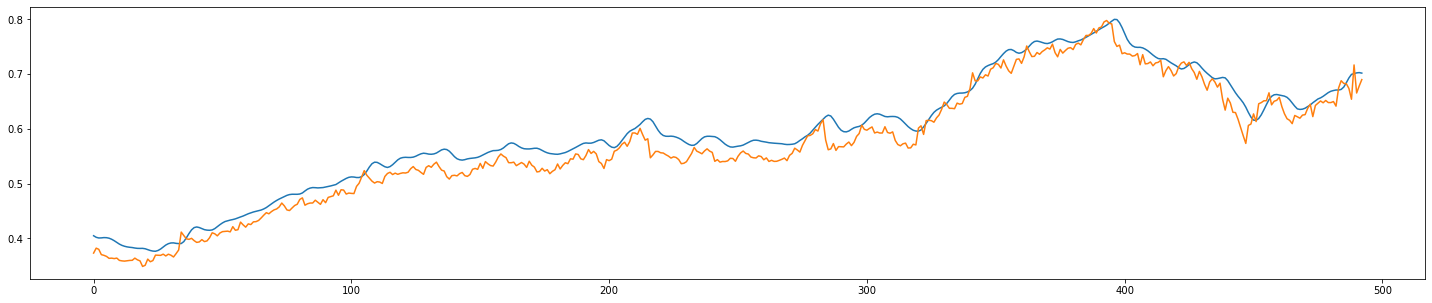

In [158]:
fig,ax=plt.subplots(1,figsize=(25,5))
ax.plot(ans[:-350])
ax.plot(y_test[:-350])
plt.show()

# Extras

In [ ]:
# from tensorflow.keras.models import Sequential,Model
# from tensorflow.keras.layers import LSTM,Dense,Input,Dropout,Concatenate,Flatten
# from keras.layers.merge import concatenate

# model2=Sequential()
# model2.add(LSTM(50,return_sequences=True, input_shape= (X_train.shape[1], 1)))
# model2.add(LSTM(50,return_sequences=False))
# model2.add(Dense(25))
# model2.add(Dense(1))


# model2.compile(loss='mean_squared_error',optimizer='adam')
# model2.fit(X_train,y_train,epochs=2,batch_size=1)


In [ ]:
series=series.reshape((series.shape[0],series.shape[1],1))

In [ ]:
b=model2.evaluate(series,targ)


In [ ]:
targ=y_test.reshape((y_test.shape[0],1,1))

In [ ]:
ans=model2.predict(X_test)

In [ ]:
ans=ans.reshape((-1,ans.shape[0]))


In [ ]:
ans = scaler.inverse_transform(ans)


In [ ]:
targ=targ.reshape((-1,targ.shape[0]))

In [ ]:
targ=scaler.inverse_transform(targ)

In [ ]:
ans=ans.reshape((ans.shape[1],ans.shape[0]))
targ=targ.reshape((targ.shape[1],targ.shape[0]))

In [ ]:
for i in range(len(ans)):
    print(ans[i],targ[i])

In [ ]:
fig,ax=plt.subplots(2,figsize=(25,5))

ax[0].plot(ans[:50],label='pred')
ax[0].plot(targ[:50],label='orig')
plt.legend()
plt.show()

In [ ]:
# stockDetails=pd.read_csv('/kaggle/input/stock-market-india/FullDataCsv/HDFCBANK__EQ__NSE__NSE__MINUTE.csv')
# srs=stockDetails['close'].dropna()

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
temp=srs.to_numpy()
srs = scaler.fit_transform(temp.reshape(temp.shape[0],1))
def split_sequence(sequence, n_steps):
	X, y = list(), list()
	for i in range(len(sequence)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the sequence
		if end_ix > len(sequence)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
		X.append(np.array(seq_x))
		y.append(seq_y)
	return X,y
x,y=split_sequence(srs, 40)

In [ ]:
srs=srs[40:]


In [ ]:

# targ=srs
# print(targ.shape)
# targ=targ.reshape((targ.shape[0],1))
# X_train, X_test, y_train, y_test = train_test_split(x, targ, test_size=0.005)


In [ ]:
# X_train=np.array(X_train)

In [ ]:
# X_train=np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))

In [ ]:
# from tensorflow.keras.models import Sequential,Model
# from tensorflow.keras.layers import LSTM,Dense,Input,Dropout,Concatenate,Flatten
# from keras.layers.merge import concatenate

# model2=Sequential()
# model2.add(LSTM(40,input_shape=(40, 1),return_sequences=True))
# model2.add(LSTM(25,return_sequences=True))
# model2.add(Flatten())
# model2.add(Dense(20,activation='relu'))
# model2.add(Dense(1,activation='relu'))


# model2.compile(loss='mean_squared_error',optimizer='adam')
# model2.fit(X_train,y_train,epochs=1,batch_size=100)

In [ ]:
X_test=np.array(X_test)
X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))

In [ ]:
ans=model2.predict(X_test)


In [ ]:
ans = scaler.inverse_transform(ans)


In [ ]:
y_test=scaler.inverse_transform(y_test)

In [ ]:
for i in range(len(ans)):
    print(ans[i],y_test[i])

In [ ]:
fig,ax=plt.subplots(2,figsize=(25,5))

ax[0].plot(ans[1250:],label='pred')
ax[1].plot(y_test[1250:],label='orig')
plt.legend()
plt.show()

In [ ]:
init=np.array(y_test[:40]).reshape((1,40,1))
lst=[]
print(init.shape)
for i in range(len(ans)-50):
    tp=(np.reshape(model2.predict(init),(1,)))
    lst.append(tp[0])
    init=list(init.reshape((40,)))
    init.append(lst[-1])
    init=np.array(init[1:],dtype=float).reshape((1,40,1))


In [ ]:
lst=np.array(lst)
lst=lst.reshape((lst.shape[0],1))

In [ ]:
lst=scaler.inverse_transform(lst)

In [ ]:
print(lst)

In [ ]:
y_test=scaler.inverse_transform(y_test)

In [ ]:
y_test

In [ ]:
fig,ax=plt.subplots(2,figsize=(25,5))

ax[0].plot(lst[:45],label='pred')
ax[1].plot(y_test[40:85],label='orig')
plt.legend()
plt.show()

In [ ]:
for i in range(len(ans)-90):
    print(ans[i],y_test[i+40])